In [0]:
# Import libraries

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Get data

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-04 01:26:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.43MB/s    in 55s     

2020-05-04 01:27:40 (5.59 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# Melakukan ekstrasi file zip

import zipfile, os
local_zip = "/tmp/rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close

base_dir = "/tmp/rockpaperscissors"
train_dir = os.path.join(base_dir, "rps-cv-images")
# validation_dir = os.path.join(base_dir, "val")

In [4]:
 os.listdir('/tmp/rockpaperscissors/rps-cv-images')


['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [0]:
# Membuat direktori train paper
train_paper_dir = os.path.join(train_dir, "paper")

# Membuat direktori train Rock
train_rock_dir = os.path.join(train_dir, "rock")
# Membuat direktori train Scissors
train_scissors_dir = os.path.join(train_dir, "scissors")


In [0]:
# Membuat objek image generator

datagen = ImageDataGenerator(
           validation_split = 0.33,
           rescale=1./255,
           rotation_range=20,
           horizontal_flip=True,
           shear_range = 0.2,
           fill_mode = 'nearest',
          )

In [7]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

Found 1468 images belonging to 3 classes.


In [8]:
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 720 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 36s - loss: 1.0944 - accuracy: 0.3900 - val_loss: 1.0045 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 36s - loss: 0.8665 - accuracy: 0.6143 - val_loss: 0.6291 - val_accuracy: 0.6687
Epoch 3/20
25/25 - 36s - loss: 0.4648 - accuracy: 0.8338 - val_loss: 0.3411 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 35s - loss: 0.3475 - accuracy: 0.8819 - val_loss: 0.2578 - val_accuracy: 0.9306
Epoch 5/20
25/25 - 36s - loss: 0.2383 - accuracy: 0.9112 - val_loss: 0.3654 - val_accuracy: 0.8313
Epoch 6/20
25/25 - 35s - loss: 0.2796 - accuracy: 0.8894 - val_loss: 0.2780 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 35s - loss: 0.2190 - accuracy: 0.9212 - val_loss: 0.3184 - val_accuracy: 0.8875
Epoch 8/20
25/25 - 35s - loss: 0.1695 - accuracy: 0.9460 - val_loss: 0.2112 - val_accuracy: 0.9444
Epoch 9/20
25/25 - 35s - loss: 0.1797 - accuracy: 0.9362 - val_loss: 0.2500 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 39s - loss: 0.1997 - accuracy: 0.9334 - val_loss: 0.0973 - val_accuracy: 0.9750
Epoch 11/

Saving itXNIVO7ghl2qja8.png to itXNIVO7ghl2qja8.png
itXNIVO7ghl2qja8.png
scissors


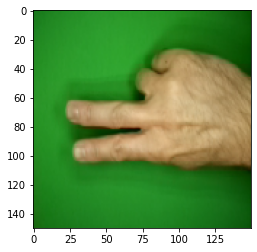

In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  
  print(fn)
  
  # Labelling data
  if classes[0][0] == 1.0 :
     print("paper")
  elif classes[0][1] == 1.0 :
     print("rock")
  elif classes[0][2] == 1.0 :
     print("scissors")